In [1]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from sowce.data.dataset_classes import VisiumCohort
from sowce.analysis.region_identification import get_spots_with_cellpop
from sowce.analysis.region_identification import create_islet_and_margin_masks
import matplotlib.pyplot as plt

/home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/owkin/.config/sagemaker/config.yaml


In [10]:
import scanpy as sc

In [2]:
ids = [
    "CH_B_001b_vbu", "CH_B_002b_vbu", "CH_B_003b_vbu"
]


In [3]:
dataset_id = "dataset-dc3510e2-76eb-47f6-9bb4-d20d340ee808" # chuv
#dataset_id = "dataset-c1521eca-c504-4752-8597-bd375b4deaa1" # uker
zarr_dir = f"/home/owkin/data/{dataset_id}/without_spotclean/SpatialData"
path_dataset = f"{zarr_dir}/*.zarr"
dataset = VisiumCohort(
    path_dataset=path_dataset,
    normalization="log_norm_count", # load log(1+CPM) data
    deconvolution_slot_name = "deconv_cohort_level_2",
    radius=1,
    list_sample_ids=ids
)

In [12]:
sample_id = "CH_B_003b_vbu"
visium_sample = dataset._dict_visium_samples[sample_id]

In [13]:
_ = visium_sample.load_counts()

In [14]:
adata = visium_sample.get_adata(load_images=True, load_obs=True)

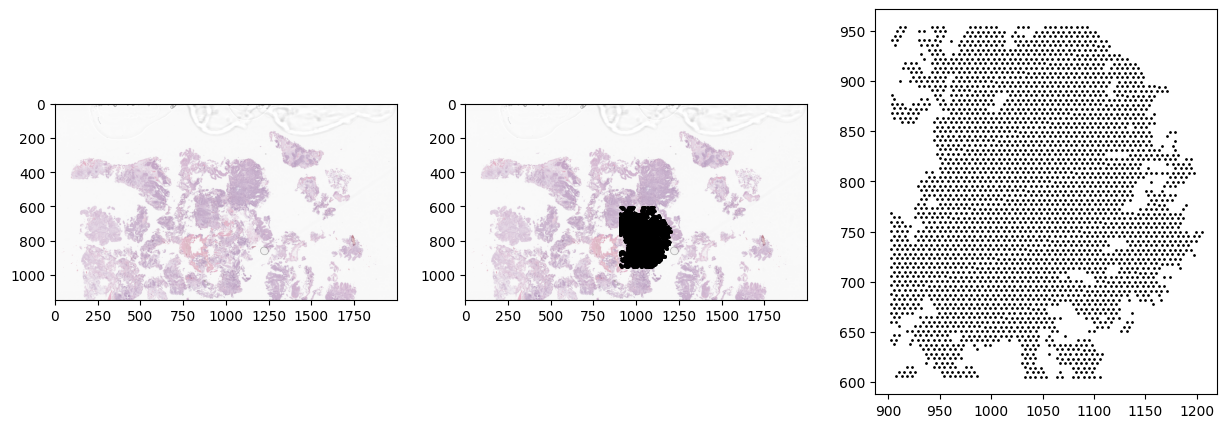

In [15]:
counts = visium_sample.load_counts(store=True)

deconv = visium_sample.load_deconvolution()

adata = visium_sample.get_adata(load_images=True)
visium_coords = visium_sample.coords.loc[sample_id][["imagerow", "imagecol"]].to_numpy()

image = adata.uns["spatial"][f"{sample_id}"]["images"]["hires"]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[1].imshow(image)
axs[1].scatter(visium_coords[:, 1], visium_coords[:, 0], color="black", s=1)
axs[2].scatter(visium_coords[:, 1], visium_coords[:, 0], color="black", s=1)
plt.show()

... storing 'DominantCellType' as categorical


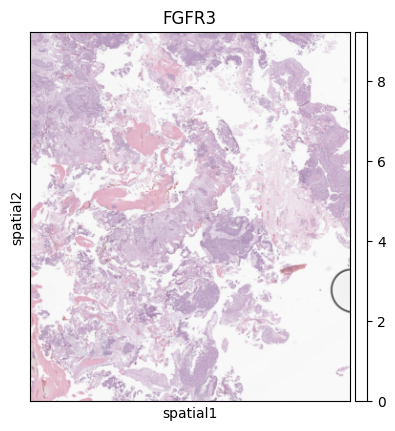

In [16]:
sc.pl.spatial(adata, img_key = "hires",color=['FGFR3'], alpha=0)